In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Single-cell assembled isoforms

In [2]:
runs = ["20220719_K562R1", "20220719_K562R2", "20220719_K562R3", "20220719_K562R4", "20220729_K562R1", "20220729_K562R2"]
d = pd.read_csv("../../1_FLAIRseq/reports/FLAIRseq_Summary.tsv", sep="\t")
d = d[[run in runs for run in d["Run"]]]
d = d[d["UMIs"] >= 5000]
print("Cells:", len(d))

Cells: 426


In [3]:
lengths = []
for cell in d["Cell"]:
    path = "../../1_FLAIRseq/results/assembly/sqanti3/%s/%s/%s_classification.txt" % (cell.split(".")[0], cell, cell)
    if os.path.exists(path):
        tmp = pd.read_csv(path, sep="\t")
        lengths.extend(tmp["length"])
print("Isoforms:", len(lengths))

Isoforms: 1877612


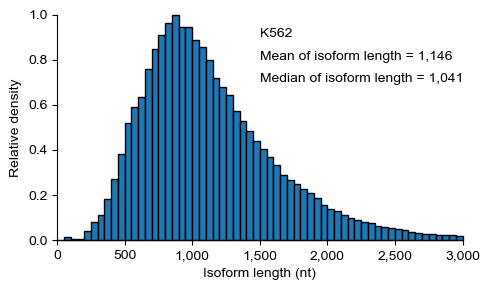

In [6]:
plt.figure(figsize=(5, 3))
ret = plt.hist(lengths, bins=60, range=(0, 3000), color="C0", edgecolor="black", clip_on=False)
vmax = max(ret[0])
plt.text(1500, vmax * 0.9, "K562")
plt.text(1500, vmax * 0.8, "Mean of isoform length = %s" % format(int(np.mean(lengths)), ","))
plt.text(1500, vmax * 0.7, "Median of isoform length = %s" % format(int(np.median(lengths)), ","))
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xlabel("Isoform length (nt)")
plt.ylabel("Relative density")
xlim = 3000
plt.xlim(0, xlim)
plt.ylim(0, vmax)
xs = np.arange(0, xlim + 1, 500)
ys = np.arange(0, 1.1, 0.2)
plt.xticks(xs, [format(x, ",") for x in xs])
plt.yticks([vmax * y for y in ys], ["%.1f" % y for y in ys])
plt.tight_layout()
plt.savefig("figures/isoform_lengths.pdf")

## 2. Merged isoforms

In [5]:
path = "../../1_FLAIRseq/results/assembly/tama/sqanti3/K562/K562_classification.txt"
lengths = pd.read_csv(path, sep="\t")["length"]
print("Isoforms:", len(lengths))

Isoforms: 415139


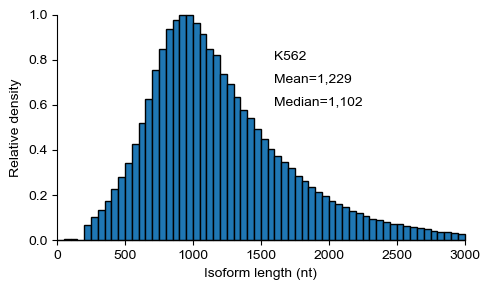

In [6]:
plt.figure(figsize=(5, 3))
ret = plt.hist(lengths, bins=60, range=(0, 3000), color="C0", edgecolor="black", clip_on=False)
vmax = max(ret[0])
plt.text(1600, vmax * 0.8, "K562")
plt.text(1600, vmax * 0.7, "Mean=%s" % format(int(np.mean(lengths)), ","))
plt.text(1600, vmax * 0.6, "Median=%s" % format(int(np.median(lengths)), ","))
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xlabel("Isoform length (nt)")
plt.ylabel("Relative density")
plt.xlim(0, 3000)
plt.ylim(0, vmax)
ys = np.arange(0, 1.1, 0.2)
plt.yticks([vmax * y for y in ys], ["%.1f" % y for y in ys])
plt.tight_layout()
plt.savefig("figures/length_of_merged_isoforms.K562.pdf")